# PyDriller -- Ready to grow together (MSR 2021 Tutorial)
Maurício Aniche, Alberto Bacchelli (and Davide Spadini)

https://pydriller.readthedocs.io/en/latest/index.html

# 1. Why PyDriller?

- Extracting data from Git directly via git commands and bash scripts was just too complex.
- Little reuse, hard to comprehend scripts.
- Using JGit or GitPython directly requires lots of lines of code and similar tasks are repeated over and over again.
- Pydriller simplifies all that with a beautiful and coherent API!


# 2. Getting Started With PyDriller

We first make sure that we have the right version of Python installed (it requires Python 3.5 or newer)

In [1]:
import sys
print (sys.version)

# basic imports
from datetime import datetime
from collections import Counter

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# numpy
import numpy as np

3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


Then we can use `pip` to install pydriller in our system if we do not have it already. As simple as running the following command (the leading `!` is only to be used within jupyter notebook):

In [2]:
!pip install pydriller

     |████████████████████████████████| 71kB 5.0MB/s 
     |████████████████████████████████| 174kB 10.7MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 


We load pydriller in our python instance



In [3]:
import pydriller

The first step is to have the repository you want to analyze cloned somewhere in your local machine. You can easily do that by `git clone <repo url>`.

We are using Google Collab to write this tutorial. Google Collab does not allow us to use Git Clone. We therefore put the entire Mockito's Git repository in our Google Drive, and will connect to it.



In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/mockito'

Mounted at /content/drive
build.gradle		  gradle	     LICENSE		  src
check_reproducibility.sh  gradle.properties  README.md		  subprojects
config			  gradlew	     SECURITY.md
doc			  gradlew.bat	     settings.gradle.kts


## 2.1 Basics: The Repository object

The starting point to use pydriller is to create an object of class `Repository` that contains the git repository that you want to analyze.

In [ ]:
# you should replace the /content/drive/... with the path to the repository you want to analyse
repo = pydriller.Repository('/content/drive/MyDrive/mockito')

Once you have your `Repository` object, you can use it to obtain all kind of information about the repository, as to run your study. 

Let's say you want to collect all the commit hashes and their respective authors. We simply need to traverse all the commits in this repository (for space reasons, here we stop after 100 commits):

In [ ]:
for count,commit in enumerate(repo.traverse_commits()):
  print('Hash {}, author {}'.format(commit.hash, commit.author.name))
  if count == 20:
    break

Hash 7cf6470d88491fe472e28493b50eba8a6fbf0433, author Szczepan Faber
Hash ebf51472bf814148a922753bb1fb21aaaf652671, author Szczepan Faber
Hash 0b24d886d94c9c53eb3c0c0658bd63269eb2e1da, author Szczepan Faber
Hash 2bfc39b9d66e139686e1777063c55e4a4cc8d6cb, author Szczepan Faber
Hash 970285776a134889da73014f7d7e53b30be08d0e, author Szczepan Faber
Hash dd168ccf8306aee43f9b0e0ccbdb4155d9047081, author Szczepan Faber
Hash 0cc204151071c920248b39d490f4573b96db8e05, author Szczepan Faber
Hash c59de64363ab47d285865ed32101d721532a3f5b, author Szczepan Faber
Hash b627d3cb99263cae31ad177a23a7019fa692cb39, author Szczepan Faber
Hash d49006b862d05790eaf9e3ac919ac11972dd81ca, author Szczepan Faber
Hash d67d2557dfebb05e8e5b79dfdcf4f2dd77517e0c, author Igor Czechowski
Hash 4e765949356f1a47d7639f8e90acb29bd32c9bac, author Igor Czechowski
Hash b08f1b982d0171f0a56ce18f5584da2b7bf4261d, author Szczepan Faber
Hash 8b4719c88a39d53d0a3a7c05a67ca0466a8a5547, author Szczepan Faber
Hash ac070bb27868d5549426fce3bcb

## 2.2 Basics: The Commit and the ModifiedFile objects

The `Commit` object contains all the information about a commit, for example, the time of the commit or all the files that were modified. Each modified file is stored in a `ModifiedFile` objet.

Let see in the following how we can access this information and print it out.



In [ ]:
repo = pydriller.Repository('/content/drive/MyDrive/mockito', single='8a19d46c19fc00c56bfcaa01274bb2195d9ac6fe')
for commit in repo.traverse_commits():
    for modification in commit.modified_files:
        print('Modified file {}'.format(modification.filename))
        print(modification.diff)


Modified file InlineBytecodeGenerator.java
@@ -269,9 +269,6 @@ public class InlineBytecodeGenerator implements BytecodeGenerator, ClassFileTran
             throw t;
         }
 
-        // The object type does not ever need instrumentation.
-        targets.remove(Object.class);
-
         if (!targets.isEmpty()) {
             try {
                 assureCanReadMockito(targets);

Modified file InlineByteBuddyMockMakerTest.java
@@ -220,6 +220,20 @@ public class InlineByteBuddyMockMakerTest
         assertThat(proxy.toString()).isEqualTo("foo");
     }
 
+    /**
+     * @see <a href="https://github.com/mockito/mockito/issues/2154">https://github.com/mockito/mockito/issues/2154</a>
+     */
+    @Test
+    public void should_mock_class_to_string() {
+        MockSettingsImpl<Object> mockSettings = new MockSettingsImpl<Object>();
+        mockSettings.setTypeToMock(Object.class);
+        mockSettings.defaultAnswer(new Returns("foo"));
+        Object proxy =
+                mockMake

## 2.3 Basics: Filter

Sometimes you do not need to visit every single commit of the repository. Pydriller allows you to filter on, e.g., the types of file. Say, all commits where a `.xml` was modified. 

This configuration goes in the Repository:

In [ ]:
repo_ep = pydriller.Repository('/content/drive/MyDrive/mockito',
                               only_modifications_with_file_types=['.xml'],
                               since=datetime(2020, 1, 1, 0, 0, 0))

for commit in repo_ep.traverse_commits():
    print(commit.hash)

4e1ae5155f5e67f5afb1934f95bc8af9283da76b
662017026f1cb0a50bc28cb32e4b5806dfbdb552


## 2.4 Basics: Documentation

You can find more information about all these classes in the docs:

* https://pydriller.readthedocs.io/en/latest/repository.html
* https://pydriller.readthedocs.io/en/latest/commit.html
- https://pydriller.readthedocs.io/en/latest/modifiedfile.html

# 3. Mining Software Repositories Examples

Now that we have seen the very basics of pydriller (specifically the `Repository`, `Commit`, and `ModifiedFile`), we can use it to easily script analyses *a la* MSR, which are at the basis of many papers.

In the following, we see basic ways in which files can be tracked. In particular, we do not consider renaming of files. A good reference on how to handle them is available in the codebase of pydriller itself [here](https://github.com/ishepard/pydriller/blob/master/pydriller/metrics/process/commits_count.py#L25-L26).

## 3.1 Who are the committers of a project?

Sometimes, even for selecting the projects we want to analyze, we need to know how diverse is the population of committers (is it a project run by a single developer, by a pair, or by a larger effort?). There is a number of ways in which diversity can be ensured in the selection of project (e.g., see the work by [Nagappan et al.](https://doi.org/10.1145/2491411.2491415) for an important take on this point), but number of developers is the one that is included most of the time.

How can we get the list of committers using pydriller? Based on the examples we have seen so far, we can do it rather quickly. Let us see how.

In [ ]:
repo = pydriller.Repository('/content/drive/MyDrive/mockito')

committers = set([commit.author.name for commit in repo.traverse_commits()])
print(committers)

{'Urs Metz', 'Danny Mösch', 'Artem Prigoda', 'Gaëtan Muller', 'alberskib', 'Daniel Kroening', 'Eitan Adler', 'Marius Volkhart', 'Anuraag Agrawal', 'Jakub Vrána', 'ceduardo.melo', 'Michal Kordas', 'Patouche', 'Gunnar Wagenknecht', 'Per Lundberg', 'Philipp Jardas', 'TDurak', 'Michal', 'Naoki Takezoe', 'Bartosz Miller', 'Jan Tarnowski', 'Johnny Lim', 'Bruno Bonanno', 'Ville Saukkonen', 'Divyansh Gupta', 'Jan Mosig', 'Jason Brown', 'Tokuhiro Matsuno', 'Ariel-isaacm', 'Dennis Cheung', 'Igor Kostenko', 'Jamie Tanna', 'Garfield Tan', 'Raymond Augé', 'Fr Jeremy Krieg', 'bric3', 'Sangwoo Lee', 'David Gageot', 'dependabot[bot]', 'bruce', 'Brice Dutheil', 'Joseph Walton', 'Marc Philipp', 'sullis', 'Roman Elizarov', 'Hynek Mlnarik', 'Dr. Thomas Tautenhahn', 'Tom Ball', 'Bastien Jansen', 'David Xia', 'paulduffin', 'zoujinhe', 'Myrle Krantz', 'Christoph Dreis', 'ahmadmoawad', 'Christian Persson', 'Bartosz Bankowski', 'Shaun Abram', 'Alex Simkin', 'Vinicius Scheidegger', 'Michael Pinnegar', 'Lucas Ca

Another question one could ask now is who are the most/least prolific authors in this repository. Let's see how quickly this can be found with pydriller and python.

In [ ]:
repo = pydriller.Repository('/content/drive/MyDrive/mockito')

committers = Counter([commit.author.name for commit in repo.traverse_commits()])

print(committers.most_common(10))

[('Szczepan Faber', 2974), ('Brice Dutheil', 559), ('Continuous Delivery Drone', 431), ('Rafael Winterhalter', 278), ('shipkit-org', 213), ('Tim van der Lippe', 176), ('Mockito Release Tools', 55), ('dependabot[bot]', 54), ('Pascal Schumacher', 40), ('Christian Schwarz', 37)]


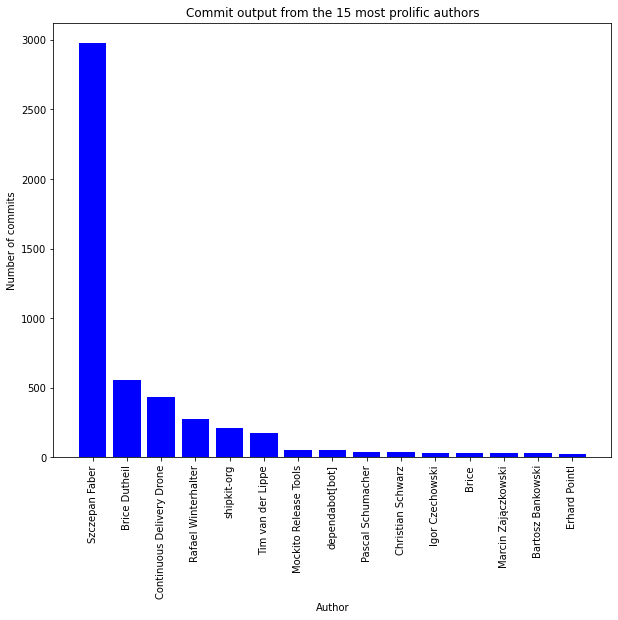

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

top_committers = dict(committers.most_common(15))

#plt.style.use('ggplot')

plt.bar(top_committers.keys(), top_committers.values(), color='blue')
plt.xticks(rotation = 90)
plt.xlabel("Author")
plt.ylabel("Number of commits")
plt.title("Commit output from the 15 most prolific authors")

plt.show()

Now let's find authors with single contributions:

In [ ]:
single_contributions = [name for name, num_of_commits in committers.items() if num_of_commits == 1]
print('We have {} authors (out of {}) who committed only once'.format(
    len(single_contributions), len(committers)))

print("First 10:")
print(single_contributions[0:10])

We have 158 authors (out of 261) who committed only once
First 10:
['David Gageot', 'andre.rigon@gmail.com', 'Krisztian Milesz', 'kuckse@dellopt-73.pragmatics.com', 'Erik Bakker', 'MEDDAH Julien', 'José Paumard', 'szpak@users.sourceforge.net', 'Eric Lefevre-Ardant', 'Ludovic Chane Won In']


## 3.2 What are the hotspots of the system?

Files that are changed several times are often considered to be *hotspots* or problematic parts in a software systems. Let us see how we can find these files using pydriller. We need to keep track of which files have been changed in every commit.


This time we use a dictionary so that it is easier to see the double loop.



In [ ]:
from collections import defaultdict
from datetime import datetime

mod_files = defaultdict(int)

# we limit ourselves to the changes in the last year
dt1 = datetime(2020, 5, 18, 0, 0, 0)
repo_java = pydriller.Repository('/content/drive/MyDrive/mockito',
                                 since=dt1,
                               only_modifications_with_file_types=['.java'])

for commit in repo_java.traverse_commits():
  for modification in commit.modified_files:
    if modification.filename.endswith('.java'):
      mod_files[modification.filename] += 1

In [ ]:
print(("number of modified files collected: %d" % len(mod_files)))

number of modified files collected: 723


Let us draw a graph with the 20 most commonly changed files.

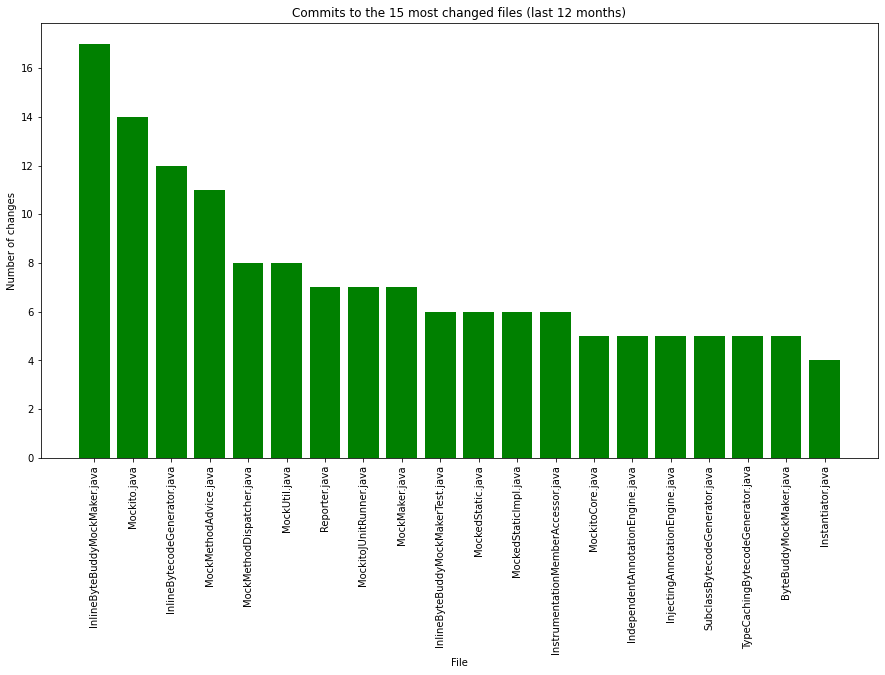

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]

hotspots = dict(Counter(mod_files).most_common(20))

#plt.style.use('ggplot')

plt.bar(hotspots.keys(), hotspots.values(), color='green')
plt.xticks(rotation = 90)
plt.xlabel("File")
plt.ylabel("Number of changes")
plt.title("Commits to the 15 most changed files (last 12 months)")

plt.show()

## 3.3 Logical coupling

Logical coupling happens when two files are committed together. Lots of work have been dedicated to this topic in the past.

Let us now write a simple pydriller script that measures logical coupling. 
(Please note that this is a very naive implementation of logical coupling; this example is meant to show that you can code whatever algorithm you want when using pydriller!)

In [9]:
since2020 = datetime(2020, 1, 1, 0, 0, 0)
repo_lc = pydriller.Repository('/content/drive/MyDrive/mockito', since=since2020)

coupling = Counter()

for commit in repo_lc.traverse_commits():
  # we keep a list of logical coupled files in this commit,
  # so that we can properly +1 them, without counting them twice.
  coupling_in_this_commit = []

  for m1 in commit.modified_files:

      # loop through all changes again to couple this file
      # with all the other files in this commit
      for m2 in commit.modified_files:
        # skip the same file
        if m1.filename == m2.filename:
          continue

        # two files together, consider logical coupling!
        # we sort the names of the classes to ensure that (A, B) and (B, A) 
        # point to the same key
        sorted_class_names = sorted([m1.filename, m2.filename])
        f1f2 = sorted_class_names[0] + "-" + sorted_class_names[1]

        # if we did not count this one yet, we do it now
        if f1f2 not in coupling_in_this_commit:
          coupling[f1f2] += 1
          coupling_in_this_commit.append(f1f2)
        
        
# print the the most coupled files
print(coupling.most_common(20))

[('official.md-version.properties', 48), ('InlineByteBuddyMockMaker.java-InlineBytecodeGenerator.java', 7), ('InlineByteBuddyMockMaker.java-Mockito.java', 6), ('InlineByteBuddyMockMaker.java-MockMethodAdvice.java', 6), ('InlineBytecodeGenerator.java-MockMethodAdvice.java', 6), ('Mockito.java-MockitoCore.java', 5), ('Mockito.java-TypeCachingBytecodeGenerator.java', 5), ('Mockito.java-MockitoJUnitRunner.java', 5), ('MockitoCore.java-TypeCachingBytecodeGenerator.java', 5), ('InlineByteBuddyMockMaker.java-MockMethodDispatcher.java', 5), ('InlineByteBuddyMockMaker.java-MockUtil.java', 5), ('InlineByteBuddyMockMaker.java-MockMaker.java', 5), ('InlineBytecodeGenerator.java-MockMethodDispatcher.java', 5), ('InlineBytecodeGenerator.java-MockUtil.java', 5), ('InlineBytecodeGenerator.java-MockMaker.java', 5), ('MockMethodAdvice.java-MockMethodDispatcher.java', 5), ('MockMethodAdvice.java-MockUtil.java', 5), ('MockMaker.java-MockMethodAdvice.java', 5), ('MockMaker.java-MockUtil.java', 5), ('Mocked

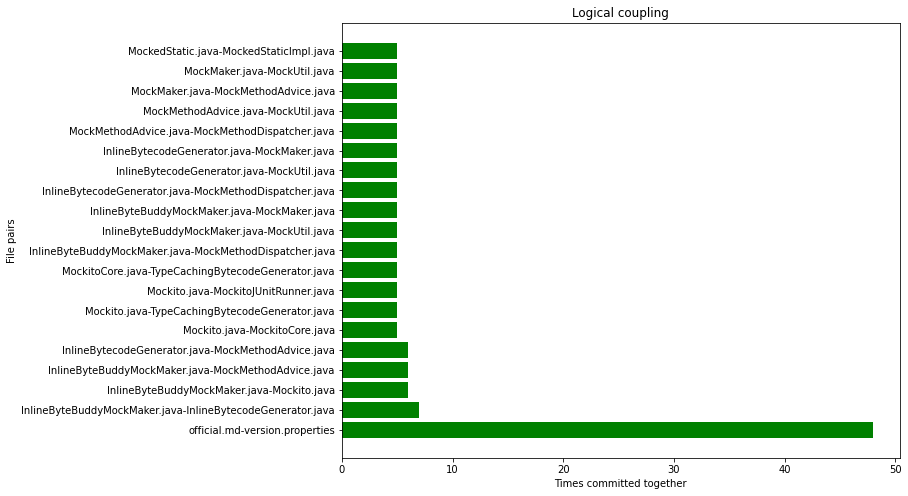

In [10]:
# plot it
plt.rcParams['figure.figsize'] = [10, 8]

hotspots = dict(coupling.most_common(20))
pairs = list(hotspots.keys())
times = list(hotspots.values())

plt.barh(pairs, times, color='green')
plt.ylabel("File pairs")
plt.xlabel("Times committed together")
plt.title("Logical coupling")

plt.show()

Of course, note that if you were going to do this in scale, you may want to optimize a few things. For example, keeping this huge dictionary in memory may not be a good idea. Maybe you want to go for a database instead?

## 3.4 Complexity growth of a file

Pydriller also calculates some code metrics out-of-the-box for you. For that, Pydriller relies on [Lizard](https://pypi.org/project/lizard/), a code analyzer that support different languages.

See the example below: we get the complexity of the `MockitoCore` class over time.

In [ ]:
repo_cc = pydriller.Repository('/content/drive/MyDrive/mockito', since=datetime(2018, 1, 1, 0, 0, 0))

complexity = []
commit_list = []
for commit in repo_cc.traverse_commits():
  for m in commit.modified_files:
    if "MockitoCore.java" in m.filename:
      complexity.append(m.complexity)
      commit_list.append(commit.hash)
      break


print(complexity)

[37, 36, 37, 38, 38, 42, 42, 42, 44, 46, 47, 47]


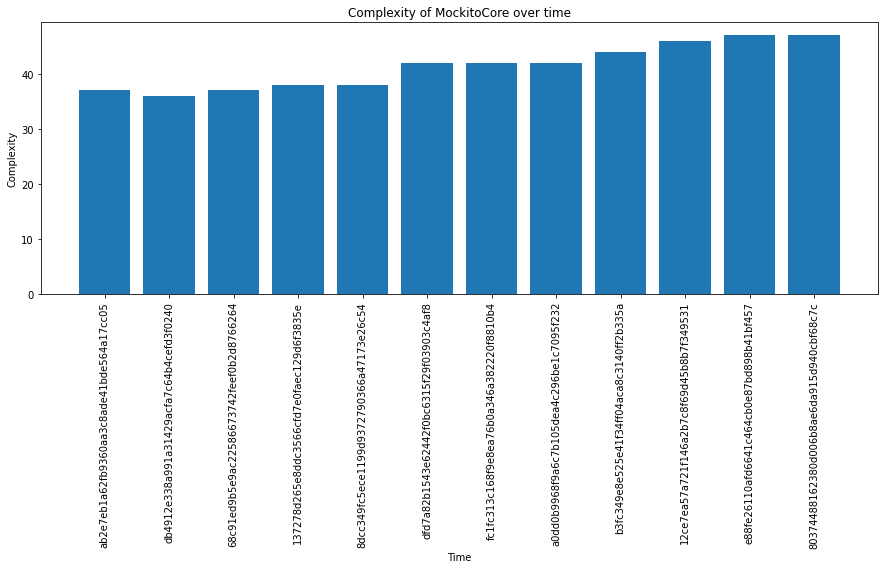

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.bar(commit_list, complexity)
plt.xlabel("Time")
plt.ylabel("Complexity")
plt.xticks(rotation = 90)
plt.title("Complexity of MockitoCore over time")

plt.show()

## 3.5 Other out-of-the-box functionality

Pydriller has many other out-of-the-box functionalities, and we recommend you to look at its manual. 

Some of them:

- We showed some ways to filter which commits to analyze, but pydriller offers more of them: https://pydriller.readthedocs.io/en/latest/repository.html#filtering-commits

- We only extract basic information about the commit, but Pydriller's `Commit` object is quite a rich one: https://pydriller.readthedocs.io/en/latest/commit.html

- The same for the `ModificationFile` object. It gives you lots of information about the specific change, e.g., diff, lines added, lines removed, source code before, source after, code metrics: https://pydriller.readthedocs.io/en/latest/modifiedfile.html

- Different classes to help you in extract some well-known process metrics, such as churn, line count, commit count, contributor count, contributor experience, and etc: https://pydriller.readthedocs.io/en/latest/processmetrics.html

Are you missing something? Let's send us a PR! How? See the next section.

# 4. Contributing to Pydriller

## 4.1 Adding traversing configuration flags

We have seen in the previous examples that we can tell pydriller how to traverse the history of the given git repository. For example, we can filter in or out certain files, branches, and periods.

If Git offers traversing functionalities that are not (yet) integrated in pydriller or if a special traversing is necessary, it is possible to expand pydriller to support them!

The software entity to consider in this case is the file `repository.py`, which also contains the definition of the class `Repository` (i.e., the entry point of any pydriller analysis).

As a practical example of a change to pydriller in this context, we have a look at the [pull request #112](https://github.com/ishepard/pydriller/pull/112), which was accepted and integrated in pydriller last year.

The goal of this pull request is to enable support for the options `--all` and `--remotes` within pydriller. These two flags enable the following behavior (from the [git documentation](https://git-scm.com/docs/git-rev-list)):

> `--all`:
> Pretend as if all the refs in refs/, along with HEAD, are listed on the command line as `<commit>`.

> `--remotes[=<pattern>]`: 
Pretend as if all the refs in refs/remotes are listed on the command line as `<commit>`. If `<pattern>` is given, limit remote-tracking branches to ones matching given shell glob. If pattern lacks `?`, `*`, or `[`, `/*` at the end is implied.

We do not go deeper into the meaning of these changes, because they are very specific git behavior, thus go beyond the scope of this tutorial. Rather we see how this was implemented in pydriller in the pull request.

The pull request changes three files:
- `pydriller/repository_mining.py` (renamed as `pydriller/repository.py` in the latest version)
- `pydriller/utils/conf.py`
- `tests/integration/test_commit_filters.py`

The first file is changed to allow users to use the new option with pydriller, while the `conf.py` builds the argument for git rev-list. We recommend to have a look at the changes itself to understand which parts they touch. In general, it is a good idea to look for previous pull requests that implement changes that are similar to the one you are interested in implemeting, as to understand which parts need to be changed and how.

### 4.1.1 Testing In Pydriller

An important aspect of this pull request is the last file, which implements tests that ensure the proper working of the new change. This is an important part because it is required for changes to pydriller to have accompanying tests in order to be approved and merged in the main repository. 

Let us have a look at these tests: https://github.com/ishepard/pydriller/pull/112/files#diff-0bf1bd4738d219fd5a423e3086299895b2e5e13d3cb0ca61aab9a016a474dceb

We note that---for each feature---there is at least one test case that exercises the behavior and checks for its correctness.

Since pydriller works on git repositories, these are often part of the testing process. For this reason, you can find a file named `test-repos.zip` that is an archive with a number of repositories that can be used for testing. These can be directly invoked from the tests and used as part of your testing activities. Of course, you can contribute with more examples also to the test repositories, if you need to check unseen behavior.

All in all, make sure that you test your changes if you want to see them integrated in pydriller! Having tests greatly improves the reliability of this tool and, in turn, of all the analyses that are done based on it, therefore we have to keep up with this important practice!

## 4.2 Supporting more git commands

Another common extension that you may want to implement in pydriller is changing the way in which certain entities are traversed. Such an extension would involve changes in both the `Repository` and the `Git` entities.

Let us see how this was done in a real-world pull request. In particular, we see the [pull request](https://github.com/ishepard/pydriller/pull/31) that added the possibility to traverse through the commits through a single file's history.

An interesting, process related aspect of this change is that it started with the creation of [an issue](https://github.com/ishepard/pydriller/issues/30). This issue was created to ask and discuss with the main maintainers whether this feature was a good idea to have in pydriller and implement it. Unless you are sure that the feature you want to have is not implemented and you know that it follows the philosophy of pydriller, it is a good idea to open an issue and discuss it with the maintainers. This way you may even discover where to start in the code with what you want to do!

Once the issue was confirmed as interesting, the developer implemented the changes in the pull request. In this case, too, we see that the changes are accompanied by tests, implemented in two files: [tests/test_repository_mining.py](https://github.com/ishepard/pydriller/pull/31/files#diff-378a824440b369b923b60aaf13ff93c29de15cbbe1ce9d6665ae49ec1f382241) and [tests/test_git_repository.py](https://github.com/ishepard/pydriller/pull/31/files#diff-1ce63c9778b0554518a3e8e36be71cba528bea283ddc1fffc12345286017e145).

The change itself makes sure that the `Repository` instance can accept this new feature when created and that the `Git` instance uses the `--follow` option when invoking the underlying GitPython library(*). 

The main function to consider is the one named `get_commits_modified_file()`, which includes most of the modifications and the main logic.

(*) In fact, pydriller uses GitPython as a layer on top of git, to ensure that it supports as many operative systems as possible and that changes to git are supported as quickly as possible (which would not be feasible if pydriller invoked git directly).

## 4.3 Further changes

Other common changes in pydriller may regard the way in which commits are analyzed. For example to add more metrics or different comparisons of diffs.

As a good starting example of this, we recommend [the pull request](https://github.com/ishepard/pydriller/pull/95) that introduced the possiblity to see which methods were changed in a commit. This modification makes use of the library [Lizard](https://pypi.org/project/lizard/) that allows one to perform code analyses in a number of languages.

It is important to know that pydriller is "lazy by default". Therefore, it is very quick to traverse commits that get basic information, because it relies on quick calls to git through GitPython. As the information that is required is more complicated to compute, the execution time of pydriller will slow down accordingly. We have to trade-off power with speed!

Another good example of a pull request that added further functionalities to pydriller is [the pull request](https://github.com/ishepard/pydriller/pull/74) that changes the way in which git blame is used and allows for further refinements in this area. This is a more complex change, so we recommend to read it only after you have become familiar with the rest of the system.

# 5. Closing

You have now reached the end of this tutorial, congratulations! We hope that it grew your interest in pydriller and in using it for your research. If you do, it would be great if you could refer to it in your papers as in the following:

```
@inproceedings{spadini2018pydriller,
  title={{PyDriller}: Python framework for mining software repositories},
  author={Spadini, Davide and Aniche, Maur{\'\i}cio and Bacchelli, Alberto},
  booktitle={Proceedings of the 26th ACM Joint Meeting on European Software Engineering
  Conference and Symposium on the Foundations of Software Engineering},
  series = {ESEC/FSE 2018},
  publisher = {Association for Computing Machinery},
  address = {New York, NY, USA},
  url = {https://doi.org/10.1145/3236024.3264598},
  doi = {10.1145/3236024.3264598},
  pages={908--911},
  year={2018}
}
```

We also hope to see you on [the GitHub repository of PyDriller](https://github.com/ishepard/pydriller), where we will be happy to discuss how to grow PyDriller together with you!